In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import numpy as np

import warnings
from collections import Counter

from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore")

In [2]:
def isNan(sum):
    return sum!=sum

In [3]:
data = pd.read_csv('data/train.csv', sep=',')
test = pd.read_csv('data/test.csv')

print(data.head())
print(len(data.columns))
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
12


SEXE : Pour le sexe, on passe en variable binaire

NAME : tfidf vectorizer de scikit learn

TICKET : garder le caractère en -1

AGE : moyenne par classe 

CABIN : valeur majoritaire des lettres de cabines par catégories de prix de ticket




In [4]:
y= data.Survived
data.drop(columns = ['Survived'])
print(data.info())
df = pd.concat([data,test], axis = 0)
print(df)
df.drop(columns = ["PassengerId"])
print(len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..         

In [5]:
df.Sex = df.Sex.apply(lambda x: 1*(x=='male'))
print(data.head())
dico_age = {(s, p): int(df.Age[(df.Sex == s) & (df.Pclass == p)].mean()) 
            for s, p in product(df.Sex.unique(), df.Pclass.unique())}
print(dico_age)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
{(

In [6]:
df['Age'] = df.apply(lambda x: dico_age[(x['Sex'], x['Pclass'])] if pd.isnull(x['Age']) else x['Age'], axis=1)
print(df)

     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
413        

In [7]:
df = df[df['Ticket'] != 'LINE']
df['NumericTicket'] = pd.to_numeric(df.Ticket.apply(lambda x: int(x.split()[-1])), errors='coerce')
invalid_tickets = df[df['NumericTicket'].isnull()]['Ticket'].unique()
df.drop(columns=['Ticket'], inplace=True)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

      Fare Cabin Embarked  NumericTicket  
0   7.2500   NaN        S          21171  
1  71.2833   C85        C          17599  
2   7.9250   NaN        S        3101282  
3  53.1000  C123        S         113803  
4   8.0500   NaN        S         373450  


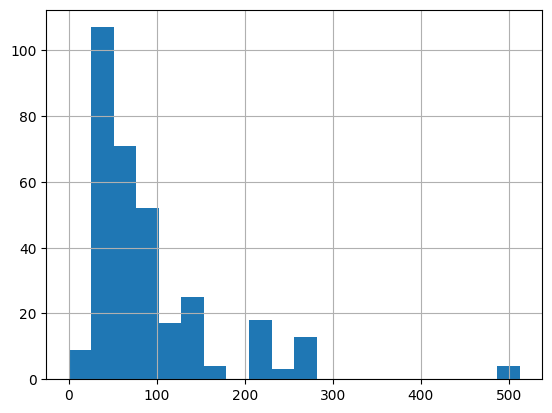

In [8]:
plt.figure()
df.Fare[df.Pclass ==1].hist(bins = 20)
plt.show()
df.drop(columns = ['Fare'], inplace=True)

In [9]:
df.Embarked.fillna('X', inplace=True)
print(df.Embarked.unique())

['S' 'C' 'Q' 'X']


In [10]:
print(df.Cabin.isna().sum())

dico_class = {p:Counter([v[0] for v in df.Cabin[df.Pclass==p] 
                         if not isNan(v)]).most_common(1)[0][0] for p in df.Pclass.unique()}
print(dico_class)
df.Cabin =[v[0] if not isNan(v) else dico_class[df.Pclass.iloc[i]] for i,v in enumerate(df.Cabin.values)]
print(df.head())

1010
{3: 'F', 1: 'C', 2: 'F'}
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

  Cabin Embarked  NumericTicket  
0     F        S          21171  
1     C        C          17599  
2     F        S        3101282  
3     C        S         113803  
4     F        S         373450  


In [11]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(np.reshape(df.Cabin.values ,(-1,1)))

transfo = encoder.transform(np.reshape(df.Cabin.values ,(-1,1)))
print(type(transfo))
colonnes = ['Cabin_'+f[-1] for f in encoder.get_feature_names_out()]
print(colonnes)
df = df.reset_index(drop=True)
df = pd.concat([df, pd.DataFrame(columns = colonnes, data = transfo)], axis = 1)
df.drop(columns=['Cabin'], inplace = True)
print(df.columns)

<class 'numpy.ndarray'>
['Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T']
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'NumericTicket', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T'],
      dtype='object')


In [12]:
encoder_emb = OneHotEncoder(sparse_output=False)

transfoma = encoder_emb.fit_transform(np.reshape(df.Embarked.values ,(-1,1)))
colonnes_emb = ['Embarked_'+f[-1] for f in encoder_emb.get_feature_names_out()]
print(colonnes_emb)
df = df.reset_index(drop=True)
df = pd.concat([df, pd.DataFrame(columns = colonnes_emb, data = transfoma)], axis = 1)
df.drop(columns=['Embarked'], inplace = True)
print(df.columns)

['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_X']
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'NumericTicket', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_X'],
      dtype='object')


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1305 non-null   int64  
 1   Survived       887 non-null    float64
 2   Pclass         1305 non-null   int64  
 3   Name           1305 non-null   object 
 4   Sex            1305 non-null   int64  
 5   Age            1305 non-null   float64
 6   SibSp          1305 non-null   int64  
 7   Parch          1305 non-null   int64  
 8   NumericTicket  1305 non-null   int64  
 9   Cabin_B        1305 non-null   float64
 10  Cabin_C        1305 non-null   float64
 11  Cabin_D        1305 non-null   float64
 12  Cabin_E        1305 non-null   float64
 13  Cabin_F        1305 non-null   float64
 14  Cabin_G        1305 non-null   float64
 15  Cabin_T        1305 non-null   float64
 16  Embarked_C     1305 non-null   float64
 17  Embarked_Q     1305 non-null   float64
 18  Embarked

In [14]:
df1 = df.iloc[:891,:]
df1["Survived"] = y

df2= df.iloc[891:,:]

In [15]:
df1.to_csv('data/train_cleaned.csv')
df2.to_csv('data/test_cleaned.csv')

In [16]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 891 to 1304
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    414 non-null    int64  
 1   Survived       0 non-null      float64
 2   Pclass         414 non-null    int64  
 3   Name           414 non-null    object 
 4   Sex            414 non-null    int64  
 5   Age            414 non-null    float64
 6   SibSp          414 non-null    int64  
 7   Parch          414 non-null    int64  
 8   NumericTicket  414 non-null    int64  
 9   Cabin_B        414 non-null    float64
 10  Cabin_C        414 non-null    float64
 11  Cabin_D        414 non-null    float64
 12  Cabin_E        414 non-null    float64
 13  Cabin_F        414 non-null    float64
 14  Cabin_G        414 non-null    float64
 15  Cabin_T        414 non-null    float64
 16  Embarked_C     414 non-null    float64
 17  Embarked_Q     414 non-null    float64
 18  Embarke